In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

1. Binary    -> 2D Matrix Binary (Boolean)
2. Grayscale -> 2D Matrix uint8
3. Color     -> 3D Matrix uint8

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


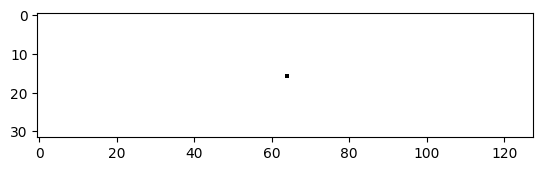

In [33]:
imBGR = np.zeros((32, 128), dtype=bool)
print(imBGR)
rows_center = imBGR.shape[0] // 2
columns_center = imBGR.shape[1] // 2

imBGR[rows_center, columns_center] = True
plt.imshow(imBGR, cmap='binary')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


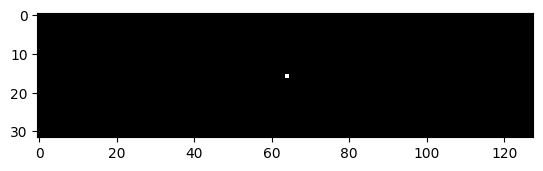

In [34]:
#Generate a 32 column by 128 column matrix as a greyscale image. Change the centre pixel to 255.

imBGR = np.zeros((32, 128), dtype='uint8')
print(imBGR)
rows_center = imBGR.shape[0] // 2
columns_center = imBGR.shape[1] // 2

imBGR[rows_center, columns_center] = 255
plt.imshow(imBGR, cmap='gray')
plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


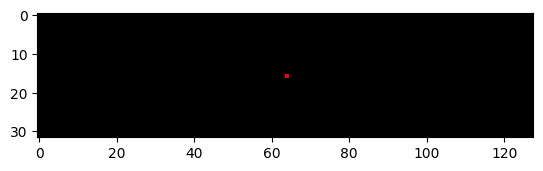

In [35]:
#Generate a 32 column by 128 column matrix as an RGB image. Change the centre pixel td RED.

imBGR = np.zeros((32, 128, 3), dtype='uint8')
print(imBGR)
rows_center = imBGR.shape[0] // 2
columns_center = imBGR.shape[1] // 2

imBGR[rows_center, columns_center] = [255, 0, 0]
plt.imshow(imBGR)
plt.show()

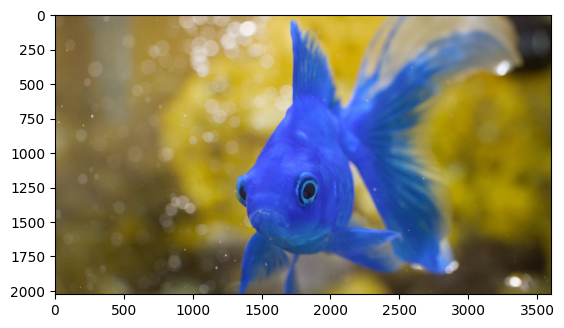

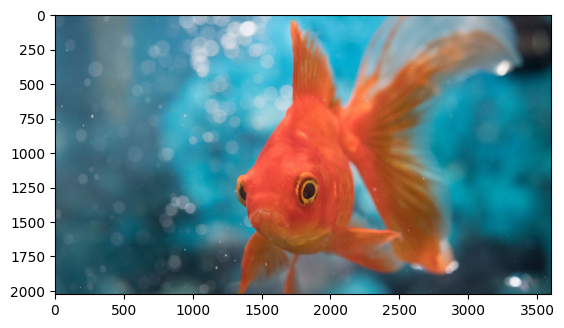

In [36]:
#Loading an image from disk and diplaying it as RGB
imBGR = cv2.imread('images/goldfish.jpg')

plt.imshow(imBGR)
plt.show()

imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

### Geometric Transformations

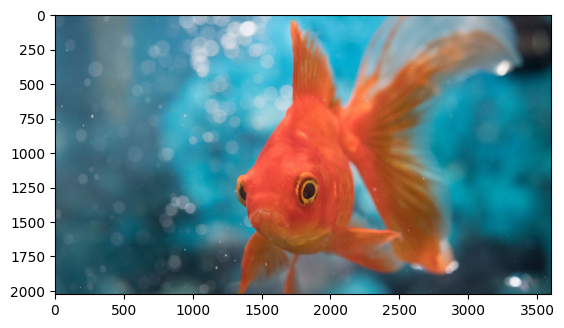

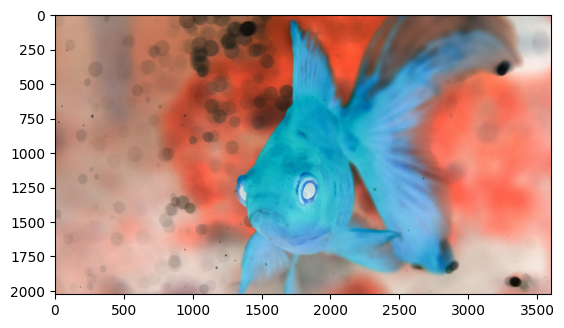

In [37]:
#invert all pixels in the image
imBGR = cv2.imread('images/goldfish.jpg')

imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

invertedRGB = 255 - imRGB
plt.imshow(invertedRGB)
plt.show()



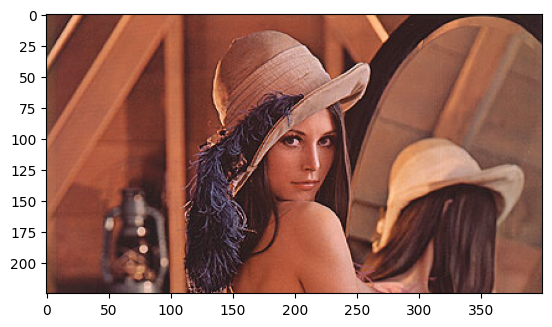

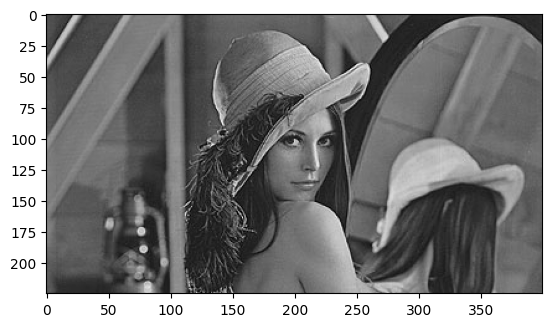

(225, 400, 3)


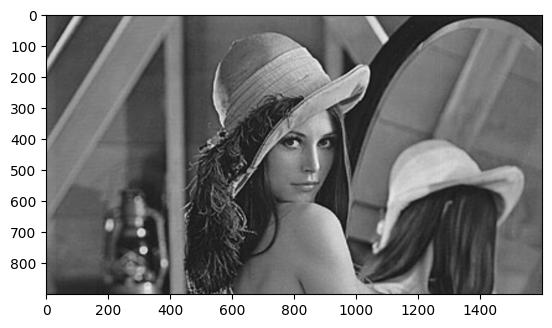

In [38]:
imBGR = cv2.imread('images/lena.jpg')

imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

imGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
plt.imshow(imGray, cmap='gray')
plt.show()

print(imRGB.shape)

imGrayresizes = cv2.resize(imGray, (imGray.shape[1]*4, imGray.shape[0]*4)) # note that opencv is coloumns(x) and rows(y)
plt.imshow(imGrayresizes, cmap='gray')
plt.show()

#output using opencv
cv2.imshow("Original", imGray)
cv2.imshow("Resized", imGrayresizes)
cv2.waitKey(0)
cv2.destroyAllWindows()

increase the brightnes sof lena.jpg by 100

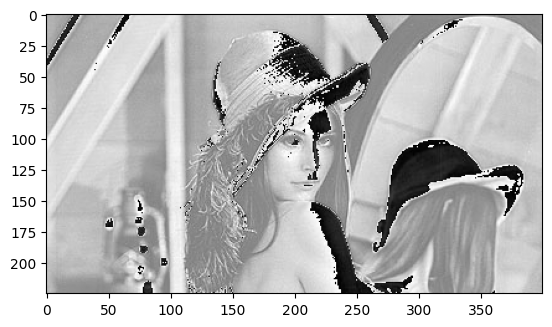

In [57]:
imBGR = cv2.imread('images/lena.jpg')
imGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)

imbright = imGray + 100
plt.imshow(imbright, cmap='gray',vmin=0, vmax=255)
plt.show()

#Note the numerical overflow

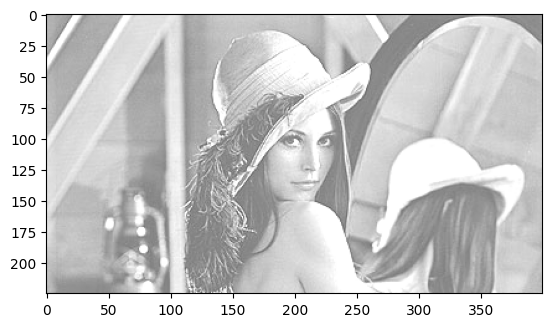

In [51]:
# OPTION 1
brightvalue = 100
 
rows, columns = imGray.shape
imBright = np.zeros(imGray.shape, dtype='uint8')
 
# Traversing the whole image (pixel by pixel)
for r in range(rows):
    for c in range(columns):
        if (int(imGray[r,c]) + brightvalue) > 255:
            imBright[r,c] = 255
        else:
            imBright[r,c] = imGray[r,c] + brightvalue
 
plt.imshow(imBright, cmap='gray', vmin=0, vmax=255)
plt.show()
 

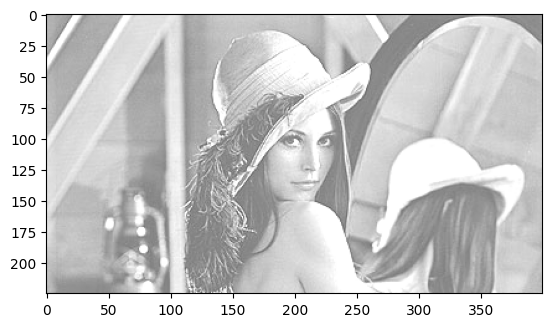

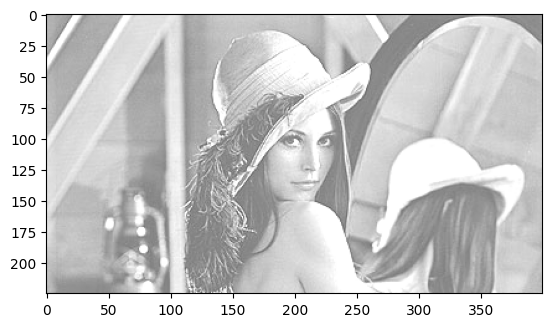

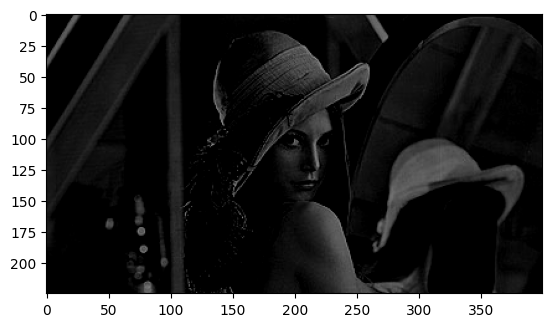

In [58]:
# Option 2 using np.where
imGrayBright2 = np.where(imGray.astype(int) + brightvalue > 255, 255, imGray + brightvalue)
plt.imshow(imGrayBright2, cmap='gray', vmin=0, vmax=255)
plt.show()

#Option 3 using np.clip
imGrayBright3 = np.clip(imGray.astype(int) + brightvalue, 0, 255).astype('uint8')
plt.imshow(imGrayBright3, cmap='gray', vmin=0, vmax=255)
plt.show()

imDark = np.clip(imGray.astype(int) - brightvalue, 0, 255).astype('uint8')
plt.imshow(imDark, cmap='gray', vmin=0, vmax=255)
plt.show()

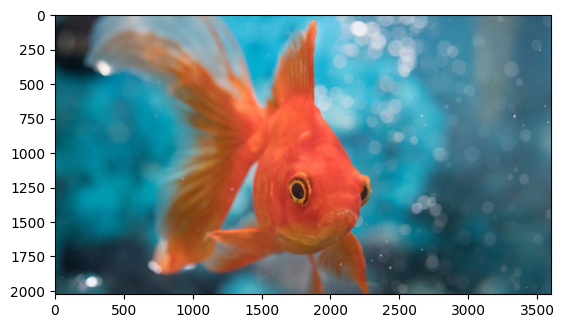

In [60]:
imBGR = cv2.imread('images/goldfish.jpg')

imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

imRGBFlipped = imRGB[:, ::-1, :]
plt.imshow(imRGBFlipped)
plt.show()

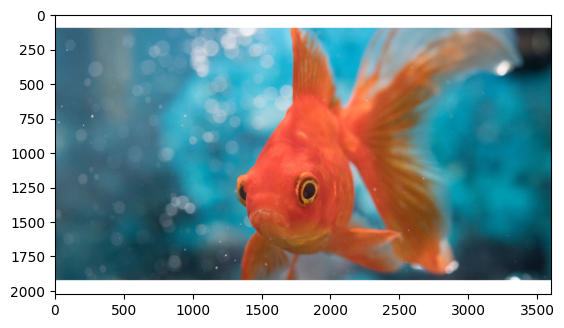

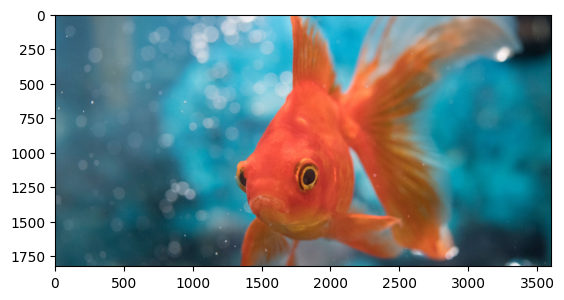

In [71]:
#draw a white border instead of the 100 px at the top and bottom of the image
imBGR = cv2.imread('images/goldfish.jpg')

imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
imRGB[:100, :] = [255, 255, 255]
imRGB[-100:, :] = [255, 255, 255]
plt.imshow(imRGB)
plt.show()

#instead of borders crop the image 100px from the top and bottom
imCrop = imRGB[100:-100, :, :]
plt.imshow(imCrop)
plt.show()